In [5]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.optimize as optimize
from batchpy import batch as bh

In [6]:
# read csv files
dosage_vs_removal = pd.read_csv('./asa_removal/dosage_vs_removal.csv', sep=';')

0    0.500000
1    0.746835
2    1.000000
3    2.000000
4    3.000000
5    5.000000
Name: dosage, dtype: float64
0    41.650824
1    62.381078
2    85.773131
3    88.466413
4    90.779468
5    92.363752
Name: removal, dtype: float64


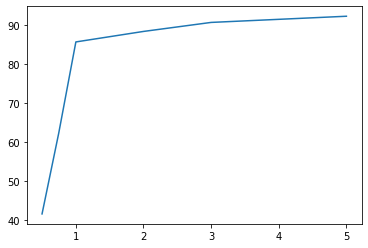

In [7]:
for data in dosage_vs_removal.keys():
    print(dosage_vs_removal[data])

plt.plot(dosage_vs_removal['dosage'], dosage_vs_removal['removal'])
plt.show()

In [96]:

data ={
    '20mg_1' : pd.read_csv('./asa_removal/qt_vs_time_20mg_1.csv', sep=';'),
    '20mg_2' : pd.read_csv('./asa_removal/qt_vs_time_20mg_2.csv', sep=';'),
    '50mg' : pd.read_csv('./asa_removal/qt_vs_time_50mg.csv', sep=';'),
    '100mg' : pd.read_csv('./asa_removal/qt_vs_time_100mg.csv', sep=';')
}

#df['20mg_1'].insert(2,'cb',[1,2,3,4], True)
print(type(data['20mg_1']))
data['20mg_1'].insert(2, 'v', 1 - data['20mg_1']['q']*3/20, True)
data['20mg_2'].insert(2, 'v', 1 - data['20mg_2']['q']*3/20, True)
data['50mg'].insert(2, 'v', 1 - data['50mg']['q']*3/50, True)
data['100mg'].insert(2, 'v', 1 - data['100mg']['q']*3/100, True)


<class 'pandas.core.frame.DataFrame'>


[2.838095]
[8.514285]


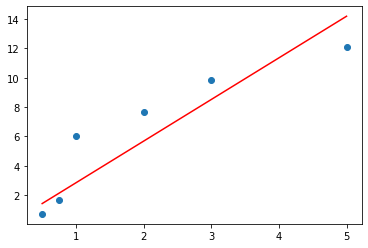

In [45]:
def alfa(x, a):
    #K = 2.2 # L/g
    #ep_rhop = 0.29e-3 # L/g
    return x * a #(ep_rhop +(1-ep)*K)

x_exp = dosage_vs_removal['dosage']
y_exp = 1/(1-dosage_vs_removal['removal']/100) - 1

constants, _ = optimize.curve_fit(alfa, x_exp, y_exp)
print(constants)
print(alfa(3,constants))
plt.scatter(x_exp, y_exp)
plt.plot(x_exp, alfa(x_exp, constants),'-r')
plt.show()

In [98]:

def func(x, bi, D_R2):
    v=np.zeros(x.shape)
    eps = 1e-6
    s=2
    a = alfa(3, 2.838095)
    t = x * D_R2
    for i in range(len(t)):
        v[i] = bh.finite_batch_bulk(t[i],bi,a,s,eps)
    return v

N=100
a_guess = 1 # <-- You have to supply a guess for kd
bi_guess = 1
x_exp = (data['20mg_1']['t'].append(data['20mg_2']['t']))
x_exp = x_exp.reset_index()['t']
y_exp = (data['20mg_1']['v'].append(data['20mg_2']['v']))
y_exp = y_exp.reset_index()['v']
print(x_exp)
print(y_exp)


0       4.615139
1       9.442446
2      19.628453
3      29.327836
4      45.004905
5      59.599723
6      74.788221
7      89.402504
8     119.709427
9     179.762683
10    239.298172
11      5.167784
12      9.897209
13     20.304305
14     30.052551
15     44.805179
16     60.183192
17     75.218655
18     90.273148
19    120.069770
20    180.302835
21    240.207788
Name: t, dtype: float64
0     0.505216
1     0.422122
2     0.237050
3     0.157734
4     0.127518
5     0.097302
6     0.169065
7     0.176619
8     0.184173
9     0.161511
10    0.184173
11    0.503556
12    0.422280
13    0.235565
14    0.154289
15    0.121339
16    0.094979
17    0.165272
18    0.171862
19    0.180649
20    0.156485
21    0.180649
Name: v, dtype: float64


[1.24143130e+01 7.06536001e-04]


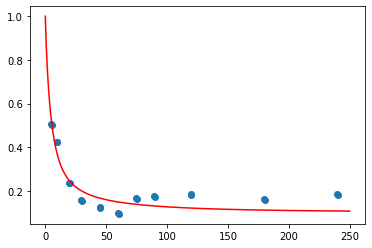

In [100]:
guess = [1,0.001]
constants, _ = optimize.curve_fit(func, x_exp, y_exp, p0 = guess)
print(constants)
x_fit = np.linspace(0.0, 250 ,1000)
y_fit = func(x_fit, constants[0], constants[1])
plt.scatter(x_exp, y_exp)

plt.plot(x_fit, y_fit ,'-r')
plt.show()